In [ ]:
import datetime as dt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import math
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

from datetime import datetime, timedelta

import gc
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from datetime import datetime
import datetime
from tqdm import tqdm
from matplotlib.patches import Rectangle
import warnings

import seaborn as sns

from sklearn import svm
from sklearn.datasets import  make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples

from joblib import dump, load

from scipy import stats
import plotly.express as px

warnings.filterwarnings("ignore")

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
all_files_cpu = glob.glob(os.path.join("/content/drive/MyDrive/Colab Notebooks/k8s/cpu/*.csv"))
all_files_cpu.sort()

li = []

for filename in all_files_cpu:
    print(filename)
    df = pd.read_csv(filename, skiprows=[0], parse_dates=['Time'])
    li.append(df)


cpu = pd.concat(li, axis=0, ignore_index=True)

fields_nodes_all = ['real: cl1i6ek5us1gmcv87dql-oqaz |  ', 'real: cl1i6ek5us1gmcv87dql-ulyg |  ', 'real: cl1i6ek5us1gmcv87dql-utuc |  ']
fields_nodes_first = ['Time', 'real: cl1i6ek5us1gmcv87dql-oqaz |  ']

cpu.columns = ['Time', 'node1', 'node2', 'node3']
cpu['nodes_all'] = cpu['node1'] + cpu['node2'] + cpu['node3']


/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU10-15__10-20.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU10-21__10-24.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU10-25__10-27.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU10-27__11-03.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU11-03__11-08.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU11-08__11-11.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU11-12__11-14.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU11-14__11-18.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU11-19__11-22.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU2023-11-22__2023-11-26.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU2023-11-27__2023-12-02.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU2023-12-02__2023-12-09.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU2023-12-10__2023-12-16.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU2023-12-17-2023-12-22.csv
/content/driv

In [ ]:
cpu

,Time,node1,node2,node3,nodes_all
0,2023-10-15 19:10:00,0.7230,0.174,0.490,1.3870
1,2023-10-15 19:15:00,1.6500,0.953,0.492,3.0950
2,2023-10-15 19:20:00,1.3900,0.824,0.378,2.5920
3,2023-10-15 19:25:00,1.4000,0.734,0.473,2.6070
4,2023-10-15 19:30:00,1.4900,0.879,0.528,2.8970
...,...,...,...,...,...
31031,2024-02-04 23:35:00,0.0799,0.218,0.186,0.4839
31032,2024-02-04 23:40:00,0.0799,0.218,0.188,0.4859
31033,2024-02-04 23:45:00,0.0801,0.215,0.188,0.4831
31034,2024-02-04 23:50:00,0.0805,0.217,0.187,0.4845


In [ ]:
df_cpu = cpu[['Time', 'node1']]
df_cpu.columns = ['time', 'cpu_usage']
df_cpu.set_index('time', inplace=True)

#df_cpu = df_cpu.resample('1H', base=0.5).last()


print(df_cpu.isnull().any())
print(df_cpu.isna().any())
df_cpu['cpu_usage'].fillna(df_cpu['cpu_usage'].mean(), inplace=True)
print(df_cpu.isnull().any())
print(df_cpu.isna().any())

cpu_usage    False
dtype: bool
cpu_usage    False
dtype: bool
cpu_usage    False
dtype: bool
cpu_usage    False
dtype: bool


In [ ]:
df_cpu

,cpu_usage
time,
2023-10-15 19:10:00,0.7230
2023-10-15 19:15:00,1.6500
2023-10-15 19:20:00,1.3900
2023-10-15 19:25:00,1.4000
2023-10-15 19:30:00,1.4900
...,...
2024-02-04 23:35:00,0.0799
2024-02-04 23:40:00,0.0799
2024-02-04 23:45:00,0.0801


In [ ]:
all_files_ram = glob.glob(os.path.join("/content/drive/MyDrive/Colab Notebooks/k8s/ram/*.csv"))
all_files_ram.sort()

li = []

for filename in all_files_ram:
    df = pd.read_csv(filename, skiprows=[0], parse_dates=['Time'])
    li.append(df)


ram = pd.concat(li, axis=0, ignore_index=True)

fields_nodes_all = ['real: cl1i6ek5us1gmcv87dql-oqaz |  ', 'real: cl1i6ek5us1gmcv87dql-ulyg |  ', 'real: cl1i6ek5us1gmcv87dql-utuc |  ']
fields_nodes_first = ['Time', 'real: cl1i6ek5us1gmcv87dql-oqaz |  ']

ram.columns = ['Time', 'node1', 'node2', 'node3']
ram['nodes_all'] = ram['node1'] + ram['node2'] + ram['node3']

In [ ]:
ram

,Time,node1,node2,node3,nodes_all
0,2023-10-15 19:10:00,37038891008,36398960640,38560374784,111998226432
1,2023-10-15 19:15:00,37153251328,36420562944,39022686208,112596500480
2,2023-10-15 19:20:00,37240102912,36420161536,39149137920,112809402368
3,2023-10-15 19:25:00,37333958656,36423467008,39163170816,112920596480
4,2023-10-15 19:30:00,37343805440,36425986048,40512155648,114281947136
...,...,...,...,...,...
31031,2024-02-04 23:35:00,59966435328,50358718464,52388679680,162713833472
31032,2024-02-04 23:40:00,60111867904,50365763584,52309880832,162787512320
31033,2024-02-04 23:45:00,60007501824,50336706560,52273143808,162617352192
31034,2024-02-04 23:50:00,59999752192,50343628800,52292202496,162635583488


In [ ]:
df_ram = ram[['Time', 'node1']]
df_ram.columns = ['time', 'ram_usage']
df_ram.set_index('time', inplace=True)

#df_ram = df_ram.resample('1H', base=0.5).last()


print(df_ram.isnull().any())
print(df_ram.isna().any())
df_ram['ram_usage'].fillna(df_ram['ram_usage'].mean(), inplace=True)
print(df_ram.isnull().any())
print(df_ram.isna().any())

ram_usage    False
dtype: bool
ram_usage    False
dtype: bool
ram_usage    False
dtype: bool
ram_usage    False
dtype: bool


In [ ]:
df_ram

,ram_usage
time,
2023-10-15 19:10:00,37038891008
2023-10-15 19:15:00,37153251328
2023-10-15 19:20:00,37240102912
2023-10-15 19:25:00,37333958656
2023-10-15 19:30:00,37343805440
...,...
2024-02-04 23:35:00,59966435328
2024-02-04 23:40:00,60111867904
2024-02-04 23:45:00,60007501824


In [ ]:
df_cpu['ram_usage'] = df_ram['ram_usage']
df = df_cpu
df

,cpu_usage,ram_usage
time,,
2023-10-15 19:10:00,0.7230,37038891008
2023-10-15 19:15:00,1.6500,37153251328
2023-10-15 19:20:00,1.3900,37240102912
2023-10-15 19:25:00,1.4000,37333958656
2023-10-15 19:30:00,1.4900,37343805440
...,...,...
2024-02-04 23:35:00,0.0799,59966435328
2024-02-04 23:40:00,0.0799,60111867904
2024-02-04 23:45:00,0.0801,60007501824


In [ ]:
fig = px.line(df, x=df.index, title='AWS ' , template = 'plotly_dark')
fig.show()
for column in df.columns:
    fig = px.line(df, x=df.index, y=[column], title='AWS ' + column, template = 'plotly_dark')
    fig.show()

# One Class SVM PyOD

In [ ]:
dataframe = df.copy()
print(len(dataframe))
dataframe.head()

31036


,cpu_usage,ram_usage
time,,
2023-10-15 19:10:00,0.723,37038891008
2023-10-15 19:15:00,1.650,37153251328
2023-10-15 19:20:00,1.390,37240102912
2023-10-15 19:25:00,1.400,37333958656
2023-10-15 19:30:00,1.490,37343805440


In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190250 sha256=036e95e059228748e5f3a6d000835eb98e0e62278aed9230277082a05cce7b69
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


In [ ]:
from pyod.models.ocsvm import OCSVM
outliers_fraction = 0.05
random_state = np.random.RandomState(2)     # A fixed values is assigned, then no matter how many time you execute your code,values generated would be the same
#Does this mean that later on the code the outliers 5% higher than maximum value of dataset?
classifiers = {
        'One Classify SVM (SVM)':OCSVM(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, nu=0.5, shrinking=True, cache_size=200, verbose=True, max_iter=-1, contamination=outliers_fraction)
}

In [ ]:
column_usage = 'cpu_usage'
X = dataframe[[column_usage]].values.reshape(-1,1)

In [ ]:
X

array([[0.723 ],
       [1.65  ],
       [1.39  ],
       ...,
       [0.0801],
       [0.0805],
       [0.0808]])

In [ ]:
from scipy import stats
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X[:400])
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)

    # copy of dataframe
    dfx = dataframe.iloc[:400]
    dfx['outlier'] = y_pred.tolist()
    #IX1 =  np.array(dfx['cpu_usage'][dfx['outlier'] == 0]).reshape(-1,1)
    #OX1 =  dfx['cpu_usage'][dfx['outlier'] == 1].values.reshape(-1,1)
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
y = dfx['outlier'].values.reshape(-1,1)

[LibSVM]OUTLIERS :  307 INLIERS :  93 One Classify SVM (SVM)


In [ ]:
dfx = dataframe.iloc[:400]


TypeError: cannot do slice indexing on DatetimeIndex with these indexers [400] of type int

In [ ]:
dfx

,cpu_usage,ram_usage,outlier
time,,,
2023-10-15 19:10:00,0.723,37038891008,1
2023-10-15 19:15:00,1.650,37153251328,1
2023-10-15 19:20:00,1.390,37240102912,1
2023-10-15 19:25:00,1.400,37333958656,1
2023-10-15 19:30:00,1.490,37343805440,1
...,...,...,...
2023-10-17 04:05:00,1.550,46593683456,1
2023-10-17 04:10:00,1.450,46634696704,1
2023-10-17 04:15:00,1.720,46738345984,1


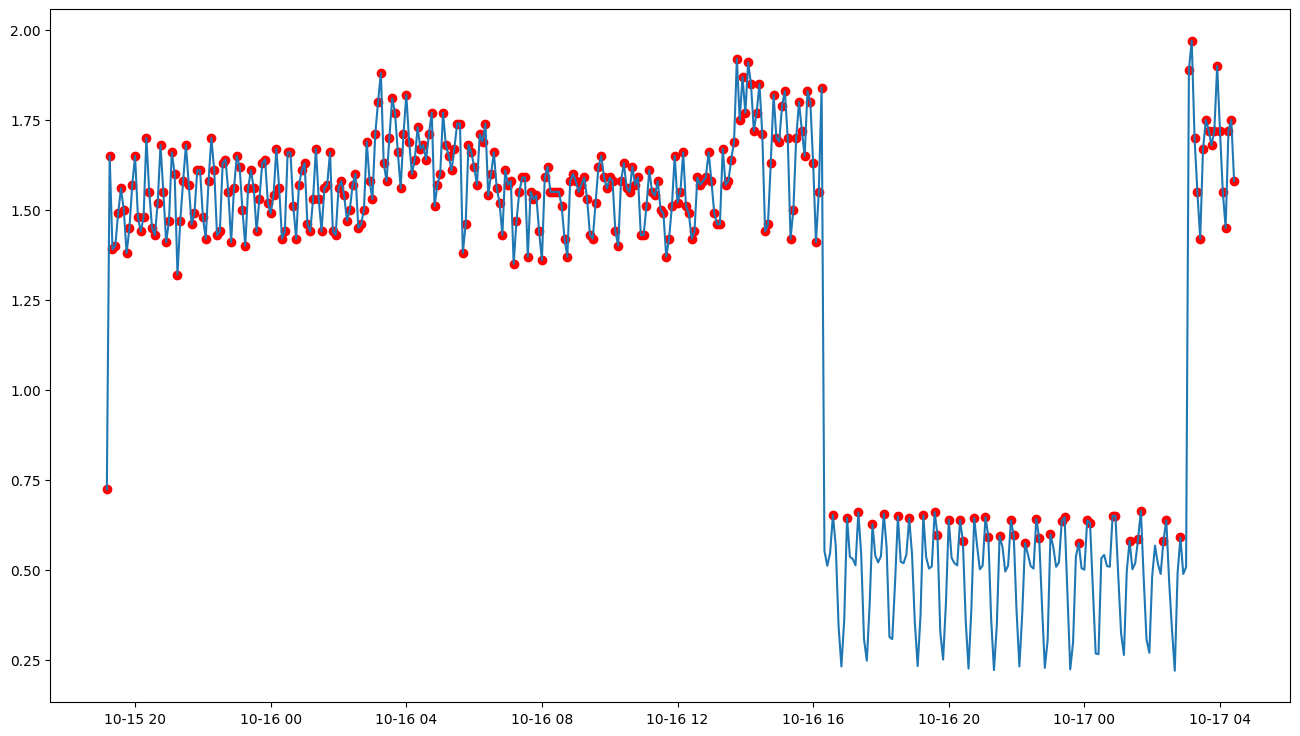

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
a = dfx.loc[dfx.outlier == 1, [column_usage]]

ax.plot(dfx.index, dfx[column_usage])
ax.scatter(a.index, a[column_usage], color='red')
plt.show()

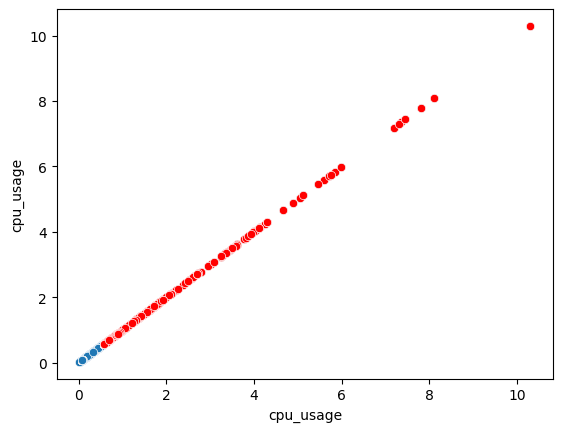

In [ ]:
sns.scatterplot(
        df,
        x=column_usage,
        y=column_usage
    )


sns.scatterplot(
        dfx.loc[dfx.outlier == 1],
        x=column_usage,
        y=column_usage,
        color='red'
    )
plt.show()

# Metrics


In [ ]:
y_pred = y_pred == 0
dfx['name'] = y_pred
y_pred

array([False, False, False, ...,  True,  True,  True])

In [ ]:
p_values = {}
p_stats_ = {}
percent = {}
silhoutte = {}
calinski_harabasz = {}
davies_bouldin = {}

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

cols_in = [column_usage]

In [ ]:
dfx['name'].value_counts()

True     29484
False     1552
Name: name, dtype: int64

In [ ]:
#percent anomaly
dist = dfx['name'].value_counts(normalize=True)
print(dist)
percent['name'] = dist.loc[True]

True     0.949994
False    0.050006
Name: name, dtype: float64


In [ ]:
#silhouette conficient samples non-anomaly
labels = [1 if i == True else 2 for i in dfx['name']]
dfx['silhouette_zcore_'] = silhouette_samples(df[[column_usage]], labels)
silhoutte['name'] = dfx[dfx['name']]['silhouette_zcore_'].mean()

In [ ]:
#ks coeficient
normal = dfx.loc[dfx['name'] == False, [column_usage]]
anomaly = dfx.loc[dfx['name'] == True, [column_usage]]
for col_in in tqdm(cols_in):
  if len(normal)>0 and len(anomaly)>0:
    stats_, pvalue = stats.kstest(normal[col_in], anomaly[col_in])
    p_values[col_in+'_'] = pvalue
    p_stats_[col_in+'_'] = stats_

100%|██████████| 1/1 [00:00<00:00, 203.78it/s]


In [ ]:
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(df[[column_usage]], labels)
calinski_harabasz['name'] = round(ch_index, 3)
print("Calinski-Harabasz Index:", round(ch_index, 3))

Calinski-Harabasz Index: 33719.845


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(df[[column_usage]], labels)
davies_bouldin['name'] = round(dbi, 3)
print("Davies-Bouldin Index:", round(dbi, 3))

Davies-Bouldin Index: 0.633


pvalue
  svm_algorithm  pvalue
0    cpu_usage_     0.0
{'cpu_usage_': 0.0}


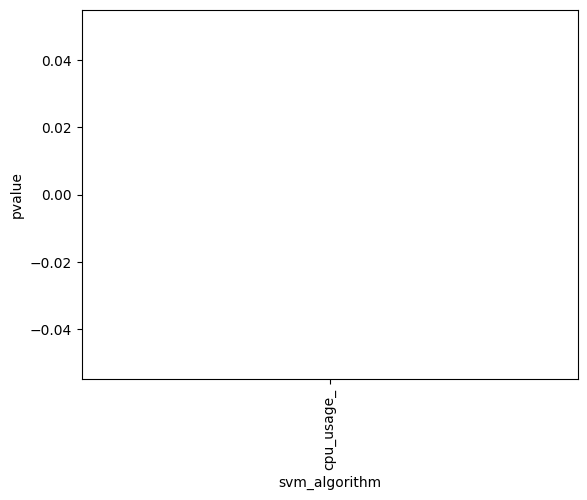

statistics
  svm_algorithm  statistics
0    cpu_usage_         1.0
{'cpu_usage_': 1.0}


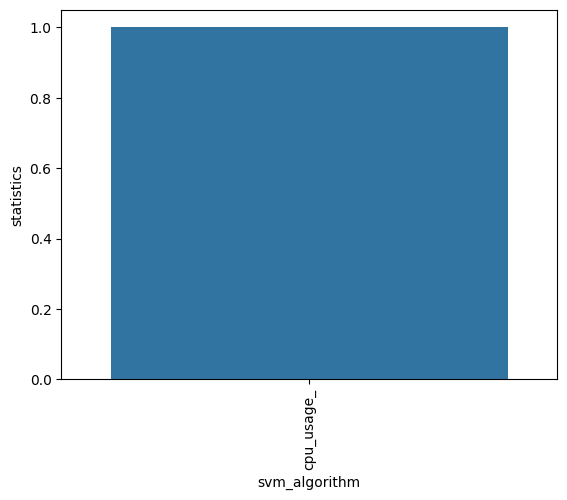

percent
  svm_algorithm   percent
0          name  0.949994
{'name': 0.9499935558706019}


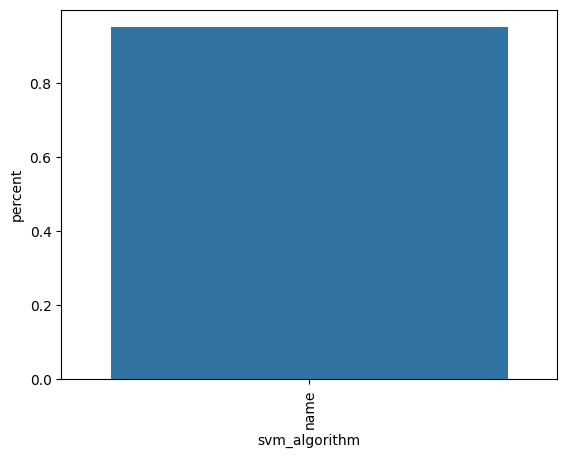

silhoutte
  svm_algorithm  silhoutte
0          name   0.908541
{'name': 0.9085407509160578}


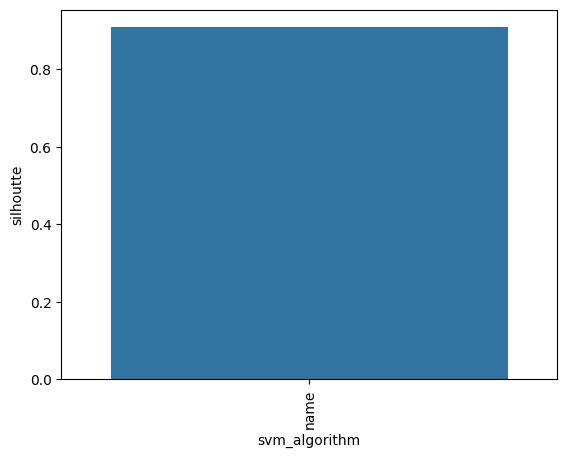

calinski_harabasz
  svm_algorithm  calinski_harabasz
0          name          33719.845
{'name': 33719.845}


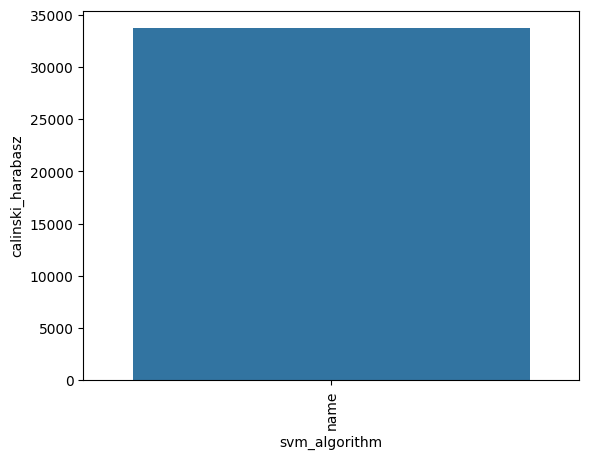

davies_bouldin
  svm_algorithm  davies_bouldin
0          name           0.633
{'name': 0.633}


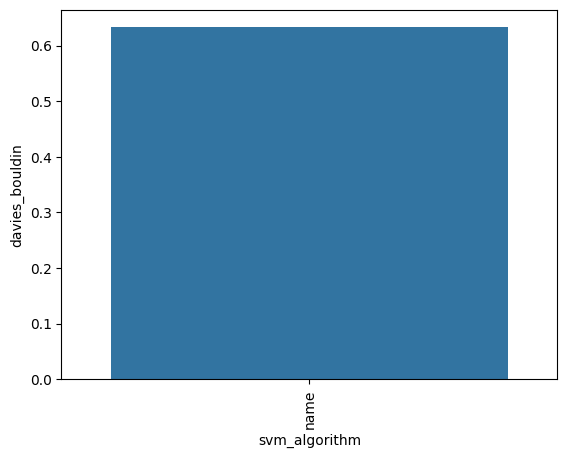

In [ ]:
for name, dictionary in {'pvalue': p_values, 'statistics': p_stats_, 'percent': percent, 'silhoutte':silhoutte, 'calinski_harabasz': calinski_harabasz, 'davies_bouldin': davies_bouldin}.items():
    print(name)
    df_values =  pd.DataFrame([dictionary])
    df_values = df_values.T
    df_values.reset_index(inplace=True)
    df_values.columns = ['svm_algorithm', name]
    print(df_values)
    print(dictionary)

    sns.barplot(data=df_values, x='svm_algorithm', y=name)
    plt.xticks(df_values.index, df_values['svm_algorithm'].values, rotation=90)
    plt.show()

In [ ]:
for name, dictionary in {'pvalue': p_values, 'statistics': p_stats_, 'percent': percent, 'silhoutte':silhoutte, 'calinski_harabasz': calinski_harabasz, 'davies_bouldin': davies_bouldin}.items():
    print(name + ': ' + str(np.array(list(dictionary.values())).mean()))

pvalue: 0.0
statistics: 1.0
percent: 0.9499935558706019
silhoutte: 0.9085407509160578
calinski_harabasz: 33719.845
davies_bouldin: 0.633


# Save Model

In [ ]:
dump(clf, 'clf.joblib')

['clf.joblib']